# Chapter 10b yfinance

* https://aroussi.com/post/python-yahoo-finance
* https://github.com/ranaroussi/yfinance?tab=readme-ov-file

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import chardet
import pprint as pp

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
pd.options.mode.copy_on_write = True
print(pd.options.mode.copy_on_write)
pl.Config.set_verbose(True)
pl.show_versions()

def HR():
    print("-"*40)

@pl.Config(tbl_cols=-1, ascii_tables=True)
def tight_layout(df: pl.DataFrame, n=5) -> None:
    with pl.Config(tbl_cols=-1, fmt_str_lengths=n):
        print(df)

def detect_encoding(filename: str) -> str:
    """Return the most probable character encoding for a file."""
    with open(filename, "rb") as f:
        raw_data = f.read()
        print(raw_data)
        result = chardet.detect(raw_data)
        return result["encoding"]

True
--------Version info---------
Polars:              1.9.0
Index type:          UInt32
Platform:            macOS-12.7.6-x86_64-i386-64bit
Python:              3.11.5 (main, Jan 16 2024, 17:25:53) [Clang 14.0.0 (clang-1400.0.29.202)]

----Optional dependencies----
adbc_driver_manager  1.1.0
altair               5.4.0
cloudpickle          3.0.0
connectorx           0.3.3
deltalake            0.19.1
fastexcel            0.11.6
fsspec               2023.12.2
gevent               24.2.1
great_tables         0.10.0
matplotlib           3.9.2
nest_asyncio         1.6.0
numpy                2.0.2
openpyxl             3.1.5
pandas               2.2.2
pyarrow              17.0.0
pydantic             2.8.2
pyiceberg            0.6.1
sqlalchemy           2.0.32
torch                <not installed>
xlsx2csv             0.8.3
xlsxwriter           3.2.0


In [2]:
%%timeit
@pl.Config(set_verbose=False)
def timing_test():
    pass

# timing_test()

102 µs ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


---
# yfinance

* Download market data from Yahoo! Finance's API 
* https://github.com/ranaroussi/yfinance?tab=readme-ov-file

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf

FIRM = True

data = yf.Ticker("dis")

# get all stock info
# data.info

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-23 00:00:00-04:00,96.930000,97.139999,95.989998,96.239998,5388500,0.0,0.0
2024-10-24 00:00:00-04:00,96.599998,96.800003,95.250000,95.400002,5010200,0.0,0.0


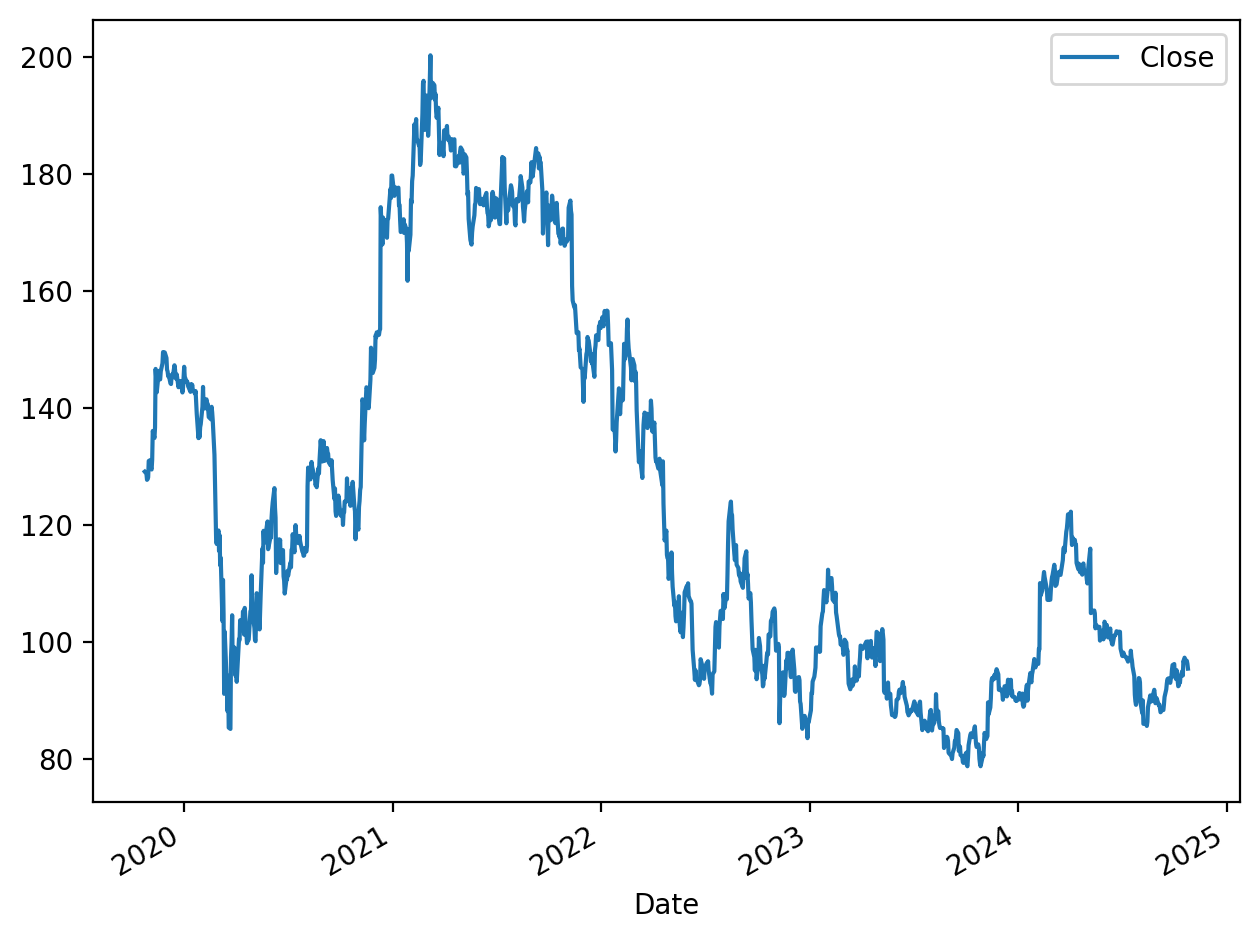

In [4]:
# get historical market data
hist = data.history(period="5y")

hist.plot(y="Close")
plt.tight_layout()

hist.tail(2)

In [5]:
# show meta information about the history (requires history() to be called first)
data.history_metadata

{'currency': 'USD',
 'symbol': 'DIS',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': -252322200,
 'regularMarketTime': 1729800145,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 95.4,
 'fiftyTwoWeekHigh': 96.8,
 'fiftyTwoWeekLow': 95.252,
 'regularMarketDayHigh': 96.8,
 'regularMarketDayLow': 95.252,
 'regularMarketVolume': 3940845,
 'longName': 'The Walt Disney Company',
 'shortName': 'Walt Disney Company (The)',
 'chartPreviousClose': 130.26,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'end': 1729776600,
   'start': 1729756800,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'end': 1729800000,
   'start': 1729776600,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'end': 1729814400,
   'start': 1729800000,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '5y',
 'validRanges'

In [6]:
# show actions (dividends, splits, capital gains)
if FIRM:
    data.actions
    data.dividends
    data.splits
    data.capital_gains  # only for mutual funds & etfs
    
    print(data.actions, data.dividends, data.splits, data.capital_gains)

                           Dividends  Stock Splits
Date                                              
2019-12-13 00:00:00-05:00       0.88           0.0
2023-12-08 00:00:00-05:00       0.30           0.0
2024-07-08 00:00:00-04:00       0.45           0.0 Date
2019-12-13 00:00:00-05:00    0.88
2023-12-08 00:00:00-05:00    0.30
2024-07-08 00:00:00-04:00    0.45
Name: Dividends, dtype: float64 Series([], Name: Stock Splits, dtype: float64) Series([], dtype: object)


In [7]:
# show share count
if FIRM:
    print(data.get_shares_full(start="2022-01-01", end=None))

2022-01-21 00:00:00-05:00    1820470016
2022-02-11 00:00:00-05:00    1820630016
2022-02-12 00:00:00-05:00    1820630016
2022-02-26 00:00:00-05:00    1820630016
2022-03-01 00:00:00-05:00    1820630016
                                ...    
2024-09-07 00:00:00-04:00    1828230016
2024-09-07 00:00:00-04:00    1813590016
2024-09-12 00:00:00-04:00    1813590016
2024-09-12 00:00:00-04:00    1815229952
2024-10-24 00:00:00-04:00    1829560064
Length: 222, dtype: int64


In [8]:
if FIRM:
    data.quarterly_income_stmt
    # - balance sheet
    data.balance_sheet
    data.quarterly_balance_sheet
    # - cash flow statement
    data.cashflow
    data.quarterly_cashflow
    # see `Ticker.get_income_stmt()` for more options

In [9]:
if FIRM:
    # show holders
    print(data.major_holders)
    HR()
    
    print(data.institutional_holders)
    HR()
    
    print(data.mutualfund_holders)
    HR()
    
    print(data.insider_transactions)
    HR()
    
    print(data.insider_purchases)
    HR()
    
    print(data.insider_roster_holders)

Breakdown                          Value
insidersPercentHeld              0.00061
institutionsPercentHeld          0.69321
institutionsFloatPercentHeld     0.69364
institutionsCount             3802.00000
----------------------------------------
  Date Reported                                     Holder  pctHeld  \
0    2023-06-30                         Vanguard Group Inc   0.0814   
1    2023-06-30                             Blackrock Inc.   0.0667   
2    2023-06-30                   State Street Corporation   0.0400   
3    2023-06-30                             Morgan Stanley   0.0241   
4    2023-06-30  State Farm Mutual Automobile Insurance Co   0.0185   
5    2023-06-30              Geode Capital Management, LLC   0.0182   
6    2023-06-30                 Northern Trust Corporation   0.0123   
7    2023-06-30        Bank Of New York Mellon Corporation   0.0112   
8    2023-06-30              Price (T.Rowe) Associates Inc   0.0100   
9    2023-06-30                Bank of Ameri

In [10]:
if FIRM:
    # show recommendations
    data.recommendations

In [11]:
if FIRM:
    data.recommendations_summary

In [12]:
if FIRM:
    data.upgrades_downgrades

In [13]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use data.get_earnings_dates(limit=XX) with increased limit argument.
if FIRM:
    data.earnings_dates

In [14]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
if FIRM:
    data.isin

In [15]:
# show options expirations
if FIRM:
    data.options

In [16]:
# show news

data.news

[{'uuid': '3e3ecd8b-234a-3576-a339-2c489ca4e2f7',
  'title': 'Disney’s (DIS) Q2 Struggles: A Key Factor in Dow’s Worst Performers Year-to-Date',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/disney-dis-q2-struggles-key-182730989.html',
  'providerPublishTime': 1729794450,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/_gG1K.MKrg_U6hqGiOHZKg--~B/aD04MTY7dz0xNDU2O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/8f30bf48abee622382b4ac6f4f499336',
     'width': 1456,
     'height': 816,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/RrwuFlLN0ej_2P4glB2wlw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/8f30bf48abee622382b4ac6f4f499336',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['DIS']},
 {'uuid': 'ed91627a-ab6b-39e1-9514-86ebaf14a8fd',
  'title': 'Goldman Sachs Adjusts Price